In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

## **Régression linéaire par moindre carrés ordinaire**


In [ ]:
""" Boston dataset is often used to illustrate concept in machine learning """
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Formule pour minimiser l'erreur quadratique moyen (moindres carrés ordinaires)

$\beta = (X^{T}X)^{-1}X^{T}Y$

[-34.67062078   9.10210898]


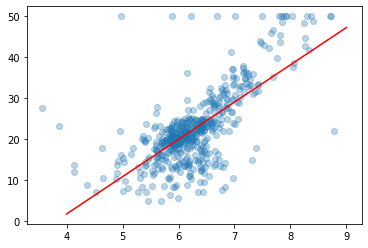

r² scrore 0.48352545599133423


In [ ]:
X = np.array(boston.data[:,5]) #RM, average number of rooms per dwelling
Y = np.array(boston.target)

plt.scatter(X, Y, alpha = 0.3)

#One column full of one is added for the independent term (theta0)
#X = np.array([np.ones(506), boston.data[:,0], boston.data[:,1], boston.data[:,2], boston.data[:,3], boston.data[:,4], boston.data[:,5], boston.data[:,6], boston.data[:,7], boston.data[:,8], boston.data[:,9], boston.data[:,10], boston.data[:,11], boston.data[:,12]]).T
X = np.array([np.ones(506), X]).T # with just one batch of data

B = np.linalg.inv(X.T @ X) @ X.T @ Y
print(B)

plt.plot([4, 9],[B[0]+ B[1]* 4, B[0]+ B[1]* 9], c = "red" )
plt.show()


ssr = np.sum( ( (X @ B) - Y )**2)
sst = np.sum( ( Y - np.mean(Y) )**2 )
r2 = 1 - (ssr/sst)
print(f"r² score {r2}")


Ce système n'est pas efficace avec des modèles plus grands ou avec d'autre fonctions de coût. Donc on va avoir besoin d'une autre méthode qui est la descente de gradient. C'est une méthode itérative qui va petit à petit se rapprocher à l'erreur minimale.


# **Méthode de descente de gradient**


# Le but
Cette méthode à pour but de déterminer des paramètres qui minimiserait une fonction donné.

# La méthode
1. Initialiser les paramètres du modèle avec des valeurs aléatoires.
2. Déterminer les dérivées partielles par rapport aux paramètres de la fonction de coût.
3. Actualiser les paramètres selon la formule:
\begin{equation*}
j \in N , \ \ \ \forall j \in [0,n] \\
\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, ... ,\theta_n) \\
\alpha : learning\ rate
\end{equation*}
4. Ré-itérer l'étape 2 et 3 un grand nombre de fois.

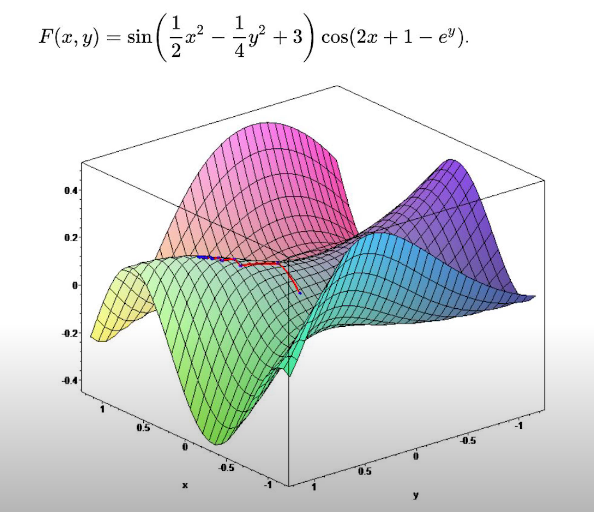

Pour comprendre l'algorithme suivant, il faut se référer à la définition même d'une dérivée:
\begin{equation*}
\frac{d}{{dx}}f\left( x \right) = \mathop {\lim }\limits_{h \to 0} \frac{{f\left( {x + h } \right) - f\left( x \right)}}{h }
\end{equation*}


[-1.91691523  0.44592089]


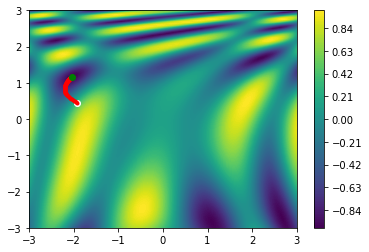

[-2.02885888  1.17073521]


In [36]:
func = lambda th: np.sin(1/2 * th[0]**2 - 1/4 * th[1]**2 +3)*np.cos(2*th[0]+1- np.e**th[1])
res = 150
_X = np.linspace(-3,3, res) #res points between -3 and 3
_Y = np.linspace(-3,3, res) #same

_Z = np.zeros((res, res)) #res square matrix filled with 0

for ix, x in enumerate(_X): 
  for iy, y in enumerate(_Y):
    _Z[iy, ix] = func([x , y]) #calculate for each cells of _Z its coordinate through func


plt.contourf(_X, _Y, _Z, res) #plot _Z as a 2d plan
plt.colorbar()
theta = np.random.rand(2) * 4 - 2 #random initial position between [[-2, -2], [2, 2]]

print(theta)
h = 0.001 #in the formal definition of a derivate function
lr = 0.0001 #learning rate
epochs = 100000 #nb of iterations
plt.plot(theta[0], theta[1], "o", c = "white") #plot initial point in white

grad = np.zeros(2) #array([0., 0.])

for _ in range(epochs):
  for it, th in enumerate(theta):
    """
    calculate for each x and y the derivative value and store them in grad
    """
    _T = np.copy(theta)

    _T[it] = _T[it] + h #calculate theta at "x+h"
    deriv = (func(_T) - func(theta))/ h #this is the formal definition of the value of a derivate function at a given point

    grad[it] = deriv #store the derivate value in grad

  theta = theta - lr * grad #descent the gradient

  if( _ % 100 == 0):
    plt.plot(theta[0], theta[1], ".", c = "red") #each 100 iterations, plot the progression of the gradient descent

plt.plot(theta[0], theta[1], "o", c = "green") #plot final point in green
plt.show()

print(theta) #minimal value given by the descent


## **Régression linéaire par descente de gradient**

#Quel est le but d'une régression linéaire ?
Le but est de trouver la droite dont la moyenne des erreurs est la plus faible.


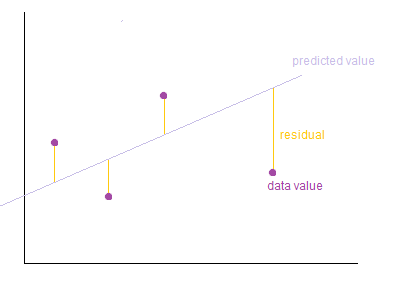

Pour définir et mesurer l'erreur du modèle que nous allons établir, nous définissons une fonction comme la somme des carrés des erreurs:
\begin{equation*}
\forall n \in \mathbb{N}^*,\  i \in \mathbb{N}\cup[\,1,n ]\,,\ (x_i,y_i)\in \mathbb{R}^2\, \\
\forall m \in \mathbb{N}^*,\  j \in \mathbb{N}\cup[\,1,m ]\,,\ \theta_j\in \mathbb{R}\, \\
J(\theta_0,...,\theta_m)= \frac 1 {2n}  \sum_{i=1}^n (h(x_i)-y_i)^2 \\
h(\theta_0,...,\theta_m)=\theta_0+\sum_{j=1}^m\theta_jx_{ij}
\end{equation*}
J est appelée la fonction de coût, h est la fonction modèle dont les m paramètres $\theta$ sont à déterminer afin de minimiser J.

Dans un premier exemple d'utilisation de cette méthode, il nous faut la dérivée partielle de cette fonction par rapport à $\theta_i$. Par récurrence nous pouvons obtenir:
\begin{equation*}
\frac{\partial}{\partial \theta_j} J(\theta_0, ... ,\theta_m) = \frac 1 n \sum_{i=1}^n (h(\theta_i)-y_i)x_i^j
\end{equation*}


Dans la pratique, les ordinateurs seront bien plus rapide si l'on considère des calculs matriciels, bien plus direct que d'effectuer toutes ces sommes une par une.


Ainsi, posons ces matrices pour la suite:
\begin{equation*}
Y=\begin{pmatrix}
y_0 \\
y_1 \\
... \\
... \\
... \\
y_n \\
\end{pmatrix}, \ \
X=\begin{pmatrix}
1 & x_{01} & x_{02} & ... & ... & ... & x_{0m} \\
1 & x_{11} & x_{12} & ... & ... & ... & x_{1m} \\
... & ... & ... & ... & & & ... \\
... & ... & ... & & ... & & ...\\
... & ... & ... & & & ... & ... \\
1 & x_{n1} & x_{n2} & ... & ... & ... & x_{nm} \\
\end{pmatrix}, \
\theta=\begin{pmatrix}
\theta_0 \\
\theta_1 \\
... \\
... \\
... \\
\theta_m \\
\end{pmatrix}
\end{equation*}

Le but est donc de trouver $\theta$ dans l'équation du modèle suivant :
\begin{equation*}
Y=h(\theta_0,...,\theta_m)=X.\theta
\end{equation*}
Matrice de dimension ( n+1 x 1 )

Reprenons donc nos étapes et traitons les sous forme matricielles:
- La fonction de coût peut s'écrire:
 \begin{equation*}
 J(\theta)= \frac 1{2n} \sum (X.\theta-Y)^2
 \end{equation*}
 Matrice de dimension (1x1)

- Les dérivées partielles peuvent s'écrire:
 \begin{equation*}
 \frac{\partial}{\partial \theta} J(\theta) = \frac 1 m X^T.(X.\theta-Y)
 \end{equation*}
 Matrice de dimension ( m+1 x 1 ) ( dimension de $\theta$ )

- La descente de gradient s'écrit donc :
\begin{equation*}
\theta=\theta-\alpha\frac{\partial}{\partial \theta} J(\theta) \\
\alpha : learning\ rate
\end{equation*}
Matrice de dimension ( m+1 x 1 )


In [55]:
def h(theta, X):
  return X @ theta #returns shape = (X.shape[0], 1)

def partial_derivative(theta, X, Y):
  return ( X.T @ ( h(theta, X) - Y ) ) / ( len( theta ) ) #returns shape = theta.shape


attributesUsed = [5, 4, 3, 2, 1, 0, 6, 7, 8, 9, 10, 11, 12] #see boston.DESCR to choose attributes you want

#init random theta
theta = np.ones((len(attributesUsed) + 1, 1)) #vector length m + 1

#target values
Y = np.zeros((len(boston.target), 1)) #vector length n + 1
Y[:,0] = boston.target

#init training values
X = np.ones((len(boston.target), len(attributesUsed) + 1 )) #matrix shape = ( n+1 , m+1 )
for i in range(1, len(X[0])):
  X[:,i] = boston.data[:,attributesUsed[i-1]]

epochs = 10000000 #nb of iterations
lr = 0.0000001 #learning rate

completion = 0
print(f"completion: {completion}%")

#the gradient descent
for _ in range(epochs):
  theta -= lr * partial_derivative(theta, X, Y)

  if (100*(_+1)/epochs % 10 == 0):
    completion +=10
    print(f"completion: {completion}%")

#print results
for i in range(len(theta)):
  print(f"theta {i}: {theta[i][0]}")

#compute r² score
ssr = np.sum( ( h(theta, X) - Y )**2)
sst = np.sum( ( Y - np.mean(Y) )**2 )
r2 = 1 - (ssr/sst)

print(f"r² score {r2}")

completion: 0%
completion: 10%
completion: 20%
completion: 30%
completion: 40%
completion: 50%
completion: 60%
completion: 70%
completion: 80%
completion: 90%
completion: 100%
theta 0: 3.1328467311561567
theta 1: 5.54345336863278
theta 2: 0.5057940412388682
theta 3: 2.589019252500563
theta 4: -0.025270384254295893
theta 5: 0.04902831162360449
theta 6: -0.09313817918495135
theta 7: -0.011519913015948098
theta 8: -0.9823437881266648
theta 9: 0.18572878309969873
theta 10: -0.010617727727741241
theta 11: -0.4429727219722073
theta 12: 0.014055120460970334
theta 13: -0.44611945545633463
r² score 0.7170252775640868


In [ ]:
def h_function(theta, X):
  return X @ theta #return shape = (X.shape[0], 1)

def cost_function(theta, X, Y):
  return np.sum( (h_function(theta, X) - Y)**2  ) / ( 2*len( theta ) ) #return shape = theta.shape


attributesUsed = [5, 4, 3, 2, 1, 0, 6, 7, 8, 9, 10, 11, 12]

#init random theta
theta = np.ones((len(attributesUsed) + 1, 1))

#target values
Y = np.zeros((len(boston.target), 1))
Y[:,0] = boston.target

#init training values
X = np.ones((len(boston.target), len(attributesUsed) + 1 ))
for i in range(1, len(X[0])):
  X[:,i] = boston.data[:,attributesUsed[i-1]]

h=0.00001
epochs = 10000000 #nb of iterations
lr = 0.0000001 #learning rate

grad = np.zeros((len(theta), 1)) #array([0., 0.])

#the gradient descent
for _ in range(epochs):
  for it, th in enumerate(theta):
    """
    calculate for each theta the derivative value and store them in grad
    """
    _T = np.copy(theta)

    _T[it] = _T[it] + h #calculate theta at "x+h"
    deriv = (cost_function(_T, X, Y) - cost_function(theta, X, Y))/ h #this is the formal definition of the value of a derivate function at a given point

    grad[it][0] = deriv #store the derivate value in grad

  theta -= lr * grad

#print results
for i in range(len(theta)):
  print(f"theta {i}: {theta[i][0]}")

#compute r² score
ssr = np.sum( ( h_function(theta, X) - Y )**2)
sst = np.sum( ( Y - np.mean(Y) )**2 )
r2 = 1 - (ssr/sst)

print(f"r² score {r2}")


theta 0: 3.144170232171059
theta 1: 5.547589037456169
theta 2: 0.5150854941788365
theta 3: 2.584393382881455
theta 4: -0.023009282139566132
theta 5: 0.0492421295910087
theta 6: -0.09329270920126859
theta 7: -0.011519633414425301
theta 8: -0.9814277376741904
theta 9: 0.18933144228310472
theta 10: -0.010904020327164747
theta 11: -0.4408174997085768
theta 12: 0.013961543551535914
theta 13: -0.44587529338646875
r² score 0.7170284582341833
